In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

## データ準備

In [2]:
df = sns.load_dataset("tips")
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

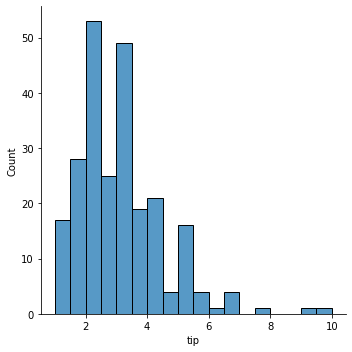

In [4]:
sns.displot(df['tip'], kde=False)

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


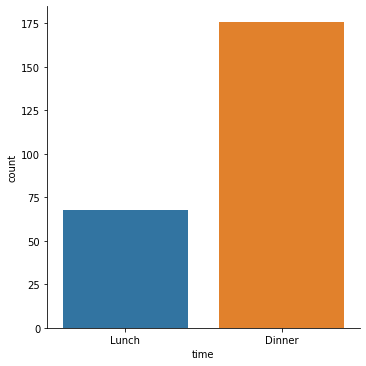

In [5]:
sns.catplot('time', data=df, kind='count')

## 平均値

In [6]:
np.mean(df['tip_rate'])

0.16080258172250478

In [7]:
df['tip_rate'].mean()

0.16080258172250478

In [8]:
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

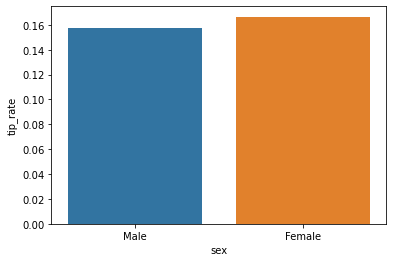

In [9]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

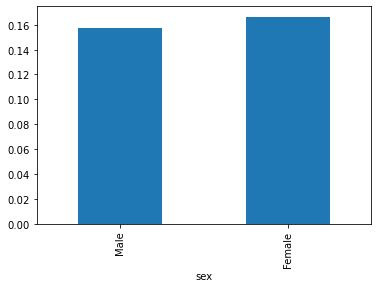

In [10]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [11]:
np.median(df['tip_rate'])

0.15476977125802577

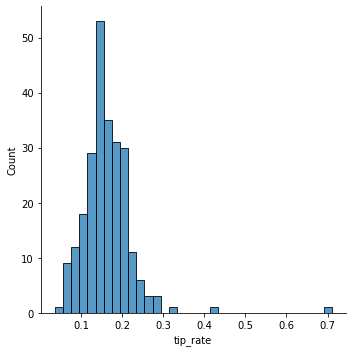

In [12]:
sns.displot(df['tip_rate'], kde=False)

In [13]:
df['tip_rate'].median()

0.15476977125802577

In [14]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

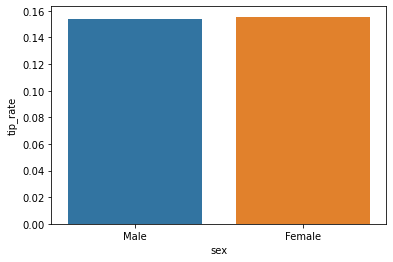

In [15]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [16]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [17]:
stats.mode(df)

ModeResult(mode=array([[13.42, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2, 0.1448225923244026]],
      dtype=object), count=array([[  3,  33, 157, 151,  87, 176, 156,   2]]))

In [18]:
df['size'].mode()

0    2
Name: size, dtype: int64

## 範囲

In [19]:
np.min(df['tip'])

1.0

In [20]:
df['tip'].min()

1.0

In [21]:
df.groupby('sex').min()

<ipython-input-21-3eee47c2438f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('sex').min()


,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [22]:
np.max(df['tip'])

10.0

In [23]:
df['tip'].max()

10.0

In [24]:
df.groupby('sex').max()

<ipython-input-24-0858c75f568a>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('sex').max()


,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [25]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [26]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [27]:
stats.iqr(df['tip_rate'])

0.06234812458689151

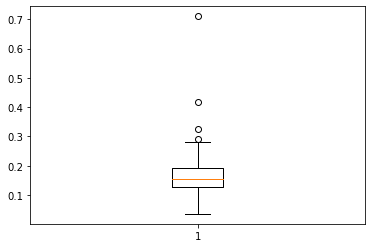

In [28]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

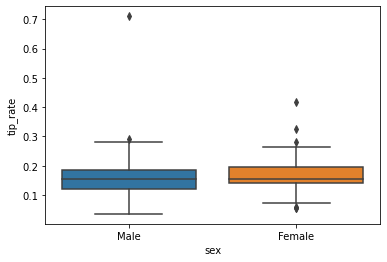

In [29]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散

In [30]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [31]:
np.std(df['tip'])

1.3807999538298958

In [32]:
np.sqrt(np.var(df['tip']))

1.3807999538298958

In [33]:
tip_mean = df['tip'].mean()
tip_mean

2.9982786885245902

## 共分散

In [36]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [39]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [40]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数

In [41]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [42]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [43]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

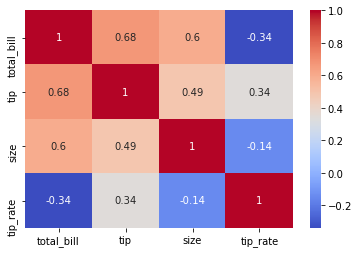

In [46]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

In [49]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [50]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [51]:
def cramers_v(x,y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [52]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [4]:
# random variates(rvs) : 確率変量
stats.randint.rvs(1, 7)

1

In [6]:
stats.uniform.rvs(0, 1)

0.5548557666506296

## 確率分布の描画

In [19]:
def simple_func(x):
    return x**2 + 3

In [20]:
simple_func(10)

103

In [24]:
# x = np.linspace(-3, 3, 100)
x = np.arange(-3, 4)
y = simple_func(x)

In [26]:
x

array([-3, -2, -1,  0,  1,  2,  3])

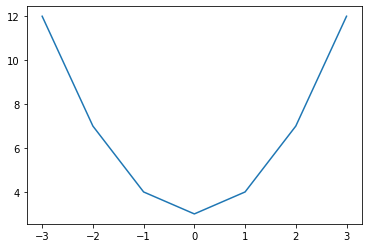

In [27]:
plt.plot(x, y)

In [35]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)

In [33]:
x

array([1, 2, 3, 4, 5, 6])

In [36]:
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

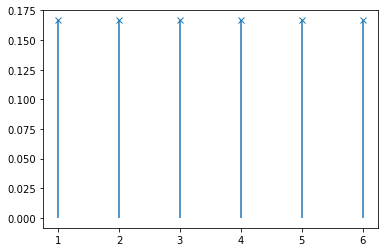

In [42]:
plt.plot(x, y ,'x')
plt.vlines(x, 0, y)

In [48]:
x = np.linspace(-2, 4, 100)
y = stats.uniform(loc=0, scale=2).pdf(x)

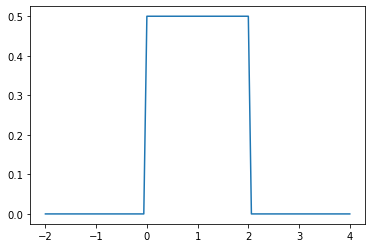

In [49]:
plt.plot(x, y)

## 累積分布関数(CDF)

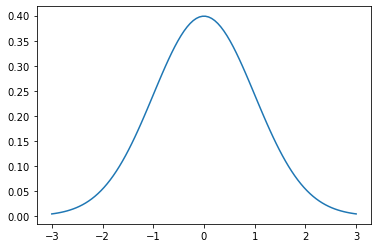

In [3]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

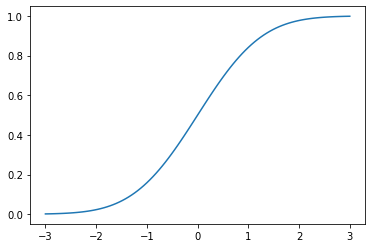

In [4]:
y = stats.norm.cdf(x)
plt.plot(x, y)

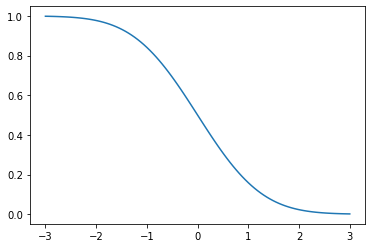

In [5]:
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

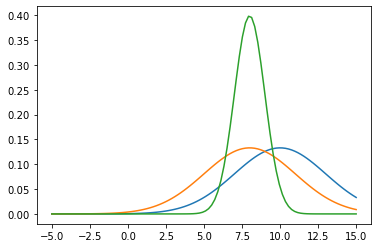

In [16]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

## カーネル密度推定(KDE)

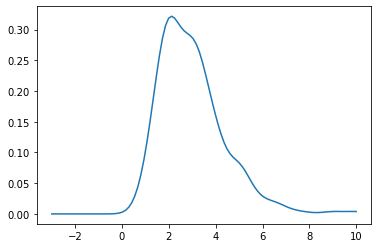

In [18]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

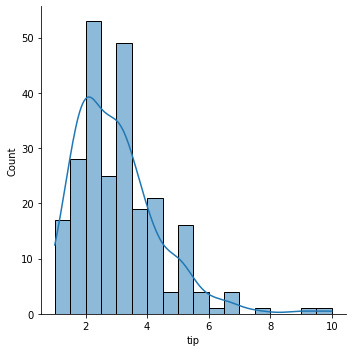

In [19]:
sns.displot(df['tip'], kde=True)

In [20]:
resumple_data = stats.gaussian_kde(df['tip']).resample()

In [21]:
resumple_data

array([[ 3.84331941,  0.85328936,  3.76319703,  3.08007844,  1.91197463,
         5.51796911,  3.01544364,  1.67931072,  1.95808338,  0.89783694,
         5.36193093,  1.91700753,  3.36275964,  2.57432617,  2.65654263,
         3.66303528,  1.55053577,  3.65782252,  3.43887908,  3.9021655 ,
         4.56059675,  1.7284334 ,  3.59634407,  2.59660285,  2.45573747,
         6.7577484 ,  1.42374881,  6.06973322,  1.73591056,  3.66286238,
         3.07057718,  2.71797542,  3.53291327,  2.53097816,  2.28146676,
         1.43351351,  3.3675199 ,  4.69967898,  3.80564834,  3.15984791,
         2.61276446,  5.12944026,  3.24130399,  2.59508831,  2.78117163,
         2.81075639,  5.20765424,  1.37455464,  2.11975638,  2.86792308,
         2.7013845 ,  2.64358387,  1.02480963,  3.09366751,  1.80906731,
         3.07972106,  2.27211425,  1.55568234,  1.1567158 ,  3.20095638,
         2.5830283 ,  1.06478345,  1.68852436,  3.33690804,  0.73666452,
         3.92811535,  1.92740811,  0.80952929,  5.1

## 68-95-99.7ルール

In [24]:
group1 = []
group2 = []
group3 = []
samples = []
loc=4
scale=3

for i in range(1000):
    sample = stats.norm(loc, scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [25]:
print(len(group1)/len(samples))
print((len(group1) + len(group2))/len(samples))
print((len(group1) + len(group2) + len(group3))/len(samples))

0.695
0.955
0.999


## 標準化

In [27]:
scaler = StandardScaler()

In [33]:
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

In [36]:
# 平均 50, 標準偏差 10 にする
scaled * 10 + 50

array([[ 33.36981828],
       [ 49.95717657],
       [ 50.94914672],
       [ 46.5507406 ],
       [ 47.70375032],
       [ 54.17363756],
       [ 61.03379478],
       [ 42.66063856],
       [ 44.99836433],
       [ 59.47315739],
       [ 50.93553526],
       [ 46.88272423],
       [ 40.3216191 ],
       [ 50.32413406],
       [ 57.02885077],
       [ 53.42053237],
       [ 50.14151189],
       [ 60.98406513],
       [ 57.45627991],
       [ 50.23381346],
       [ 60.97282376],
       [ 45.85412481],
       [ 46.81774845],
       [ 55.16606793],
       [ 49.94116426],
       [ 45.17355156],
       [ 48.16004664],
       [ 49.47525348],
       [ 56.12895542],
       [ 48.665917  ],
       [ 48.52820785],
       [ 45.9698051 ],
       [ 56.30066304],
       [ 43.04511479],
       [ 53.79214012],
       [ 48.16616736],
       [ 43.73579175],
       [ 53.36888626],
       [ 43.8951679 ],
       [ 49.8515239 ],
       [ 46.52948726],
       [ 47.48515471],
       [ 59.63290777],
       [ 45

In [35]:
scaler.fit_transform(df[['total_bill', 'tip_rate']])

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

## 二項分布

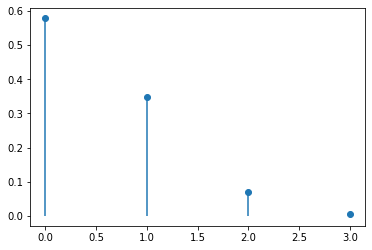

In [7]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=3, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

In [4]:
x

array([0, 1, 2, 3])

In [5]:
y

array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

## 二項分布 -> 正規分布

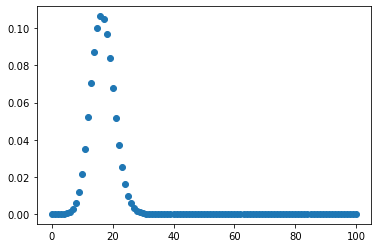

In [9]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, 'o')

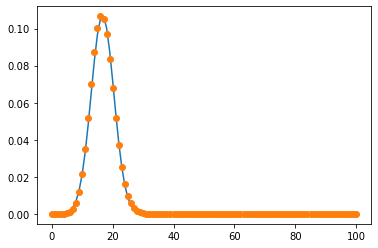

In [16]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [11]:
# 平均=np
stats.binom(n, p).mean()

16.666666666666664

In [12]:
n*p

16.666666666666664

In [13]:
stats.binom(n, p).var()

13.888888888888888

In [14]:
n*p*(1-p)

13.888888888888888

## 標本分布

In [5]:
m = 100
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [6]:
sample_means

[3.0439999999999996,
 3.338,
 3.2285999999999997,
 3.2314000000000003,
 2.8469999999999995,
 2.8418000000000005,
 3.29,
 2.9322000000000004,
 3.1123999999999996,
 2.8401999999999994,
 2.9808000000000003,
 3.2216000000000005,
 3.1145999999999994,
 3.1197999999999992,
 3.1606,
 3.3207999999999993,
 3.2965999999999998,
 3.0334,
 2.7848000000000006,
 2.9,
 3.0176000000000003,
 3.2464,
 3.0776,
 3.0443999999999987,
 2.978,
 2.8455999999999992,
 2.8510000000000004,
 2.9755999999999996,
 2.7128,
 3.0109999999999997,
 3.4464000000000006,
 2.9671999999999996,
 2.9792000000000005,
 3.2420000000000004,
 3.0504000000000002,
 2.8232,
 2.6385999999999994,
 3.071600000000001,
 2.9148,
 3.2828,
 2.7720000000000002,
 3.196199999999999,
 2.9619999999999997,
 2.9578,
 3.1012000000000004,
 2.9758,
 2.7385999999999995,
 3.0722000000000005,
 2.8754000000000004,
 3.2696000000000005,
 3.0128000000000004,
 2.9252,
 3.0117999999999996,
 3.1815999999999995,
 3.071999999999999,
 2.7434000000000003,
 2.74219999999

In [12]:
# 平均
np.mean(sample_means)

3.010722

In [18]:
# 母平均
df[column].mean()

2.9982786885245902

In [19]:
# 分散
np.var(sample_means)

0.030711504716000003

In [20]:
# 母分散/n
np.var(df[column])/n

0.03813217024993285

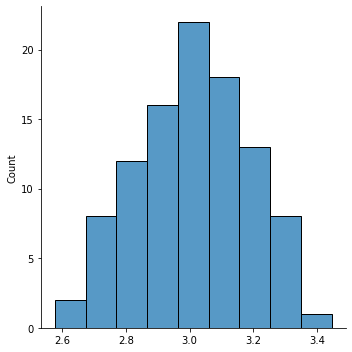

In [11]:
sns.displot(sample_means)

## 不偏分散

In [21]:
stats.tvar(df['tip'])

1.914454638062471

In [23]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [24]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [25]:
stats.tstd(df['tip'])

1.3836381890011822

In [27]:
np.std(df['tip'], ddof=1)

1.3836381890011826

## 不偏分散の不偏性

In [57]:
m = 1000
n = 50
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sampled_df = df.sample(n)
    sample_var = np.var(sampled_df[column])
    sample_uvar = stats.tvar(sampled_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [58]:
# 母分散
np.var(df[column])

1.9066085124966428

In [59]:
# 標本の分散の平均
np.mean(sample_vars)

1.84853941816

In [60]:
# 標本の不偏分散の平均
# (不偏分散の方が母分散に近い)
np.mean(sample_uvars)

1.886264712408163

## 比率の区間推定

In [83]:
# 母比率のalpha信頼区間の計算
# alpha (信頼区間: 0.95, 0.99 など)
# n:サンプルサイズ, 試行回数
# p:標本比率
# 標本比率p, 試行回数n のときの信頼区間を計算
stats.binom.interval(alpha=0.95, n=1000, p=0.6)

(570.0, 630.0)

## 

In [84]:
# 母比率の区間推定の正解率の実験
m = 100
n = 50
alpha=0.95
population_male_ratio = len(df[df['sex'] == 'Male']) / len(df)
results = []
for _ in range(m):
    sampled_df = df.sample(n)
    male_ratio = len(sampled_df[sampled_df['sex'] == 'Male']) / n
    min_num, max_num = stats.binom.interval(alpha, n, p=male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min':min_ratio, 'max':max_ratio, 'correct':correct})

In [85]:
result_df = pd.DataFrame(results)

In [86]:
result_df['correct'].value_counts()

True     94
False     6
Name: correct, dtype: int64

# 平均の区間推定

In [87]:
# 母平均のalpha信頼区間の計算
# alpha (信頼区間: 0.95, 0.99 など)
# loc:標本平均
# scale:標本分布の標準偏差の代わりに、不偏分散の平方根を使用
stats.norm.interval(alpha=0.95, loc=0, scale=1)

(-1.959963984540054, 1.959963984540054)

In [118]:
# 母比率の区間推定の正解率の実験
m = 100
n = 50
alpha=0.95
column = 'tip'
population_mean = df[column].mean()
results = []
for _ in range(m):
    # 母集団dfから標本を取得
    sampled_df = df.sample(n)
    # 標本平均を計算
    sampled_mean = sampled_df[column].mean()
    # 標本の不偏分散を計算
    sampled_var = stats.tvar(sampled_df[column])
    # 母平均のalpha信頼区間を計算
    min_mean, max_mean = stats.norm.interval(alpha, loc=sampled_mean, scale=np.sqrt(sampled_var/n))
    # 母平均がalpha信頼区間に納まっているか判定
    correct = min_mean < population_mean < max_mean
    results.append({'min':min_mean, 'max':max_mean, 'correct':correct})

In [119]:
result_df = pd.DataFrame(results)

In [120]:
result_df['correct'].value_counts()

True     93
False     7
Name: correct, dtype: int64

# t分布

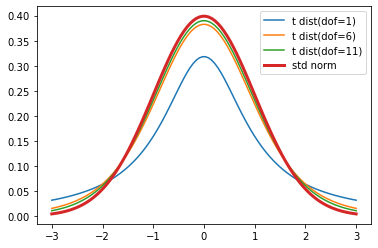

In [125]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

## 平均の区間推定(正規分布 vs t分布)

In [126]:
n = 50
alpha=0.95
column = 'tip'

# 母集団dfから標本を取得
sampled_df = df.sample(n)
# 標本平均を計算
sampled_mean = sampled_df[column].mean()
# 標本の不偏分散を計算
sampled_var = stats.tvar(sampled_df[column])
# 母平均のalpha信頼区間を計算(正規分布)
min_val_norm, min_val_norm = stats.norm.interval(alpha, loc=sampled_mean, scale=np.sqrt(sampled_var/n))
# 母平均のalpha信頼区間を計算(t分布)
min_val_t, min_val_t = stats.t.interval(alpha, loc=sampled_mean, scale=np.sqrt(sampled_var/n), df=n-1)

In [127]:
print(min_val_norm, min_val_norm)

3.1986984022144553 3.1986984022144553


In [129]:
# 正規分布と比べて、t分布のほうが裾野が広い
print(min_val_t, min_val_t)

3.2069780240433423 3.2069780240433423


## 比率差の検定(Z-test)

In [24]:

proportions_ztest([30, 33], [1000, 1000] , alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)